     SaleID RetailerCountry OrderMethod   RetailerType           ProductLine  \
0  SaleID_1   United States         Fax  Outdoors Shop  Personal Accessories   
1  SaleID_2   United States         Fax  Outdoors Shop      Sports Equipment   
2  SaleID_3   United States         Fax  Outdoors Shop                   NaN   
3  SaleID_4   United States         Fax  Outdoors Shop                   NaN   
4  SaleID_5   United States         NaN  Outdoors Shop  Personal Accessories   

    ProductType                    Product    Year  Quarter   Revenue  \
0  Cooking Gear  TrailChef Deluxe Cook Set  2018.0  Q1 2018  59728.66   
1  Cooking Gear     TrailChef Double Flame  2018.0  Q1 2018  36050.32   
2         Tents                  Star Dome  2018.0  Q1 2018  90040.48   
3         Tents               Star Gazer 2  2018.0  Q1 2018       NaN   
4     First Aid         Compact Relief Kit  2018.0  Q1 2018       NaN   

   Quantity  GrossMargin  
0     491.0     0.357548  
1     254.0     0.484274  

<ipython-input-38-3c6ffe2507ef>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GrossMargin'].fillna(df['GrossMargin'].mean(), inplace=True)  # Example for numerical columns


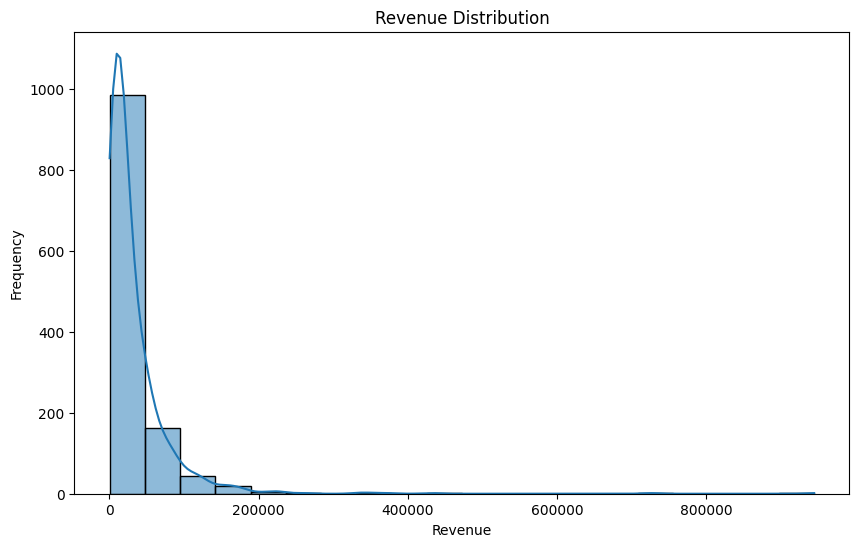

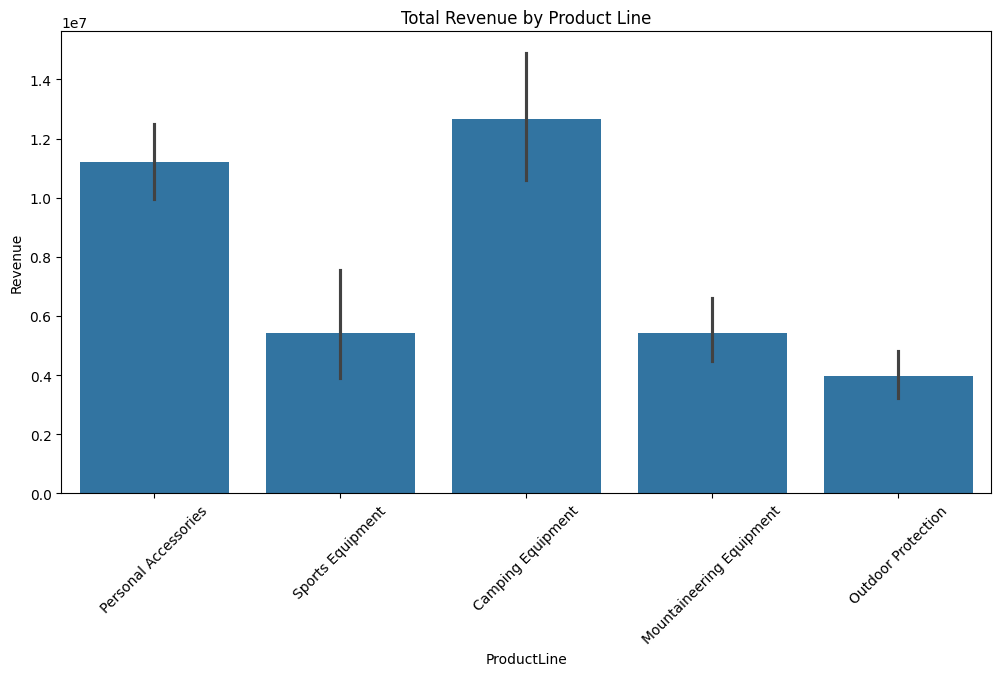

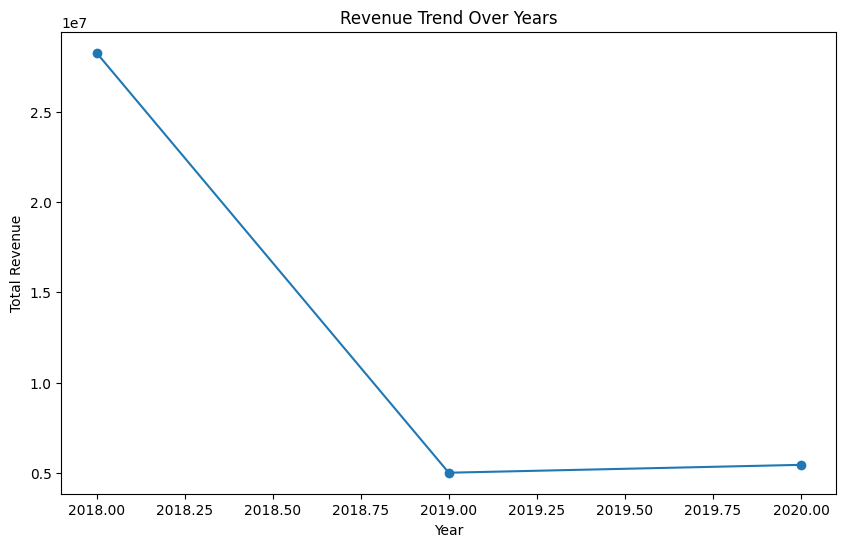

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Index(['RetailerCountry', 'OrderMethod', 'RetailerType', 'ProductLine',
       'ProductType', 'Product', 'Year', 'Quarter', 'Quantity', 'GrossMargin',
       'Profit'],
      dtype='object')
RetailerCountry      int64
OrderMethod          int64
RetailerType         int64
ProductLine          int64
ProductType          int64
Product              int64
Year                 int64
Quarter              int64
Quantity           float64
GrossMargin        float64
Profit             float64
dtype: object
Mean Absolute Error: 1523.9189661224511
R^2 Score: 98.63%


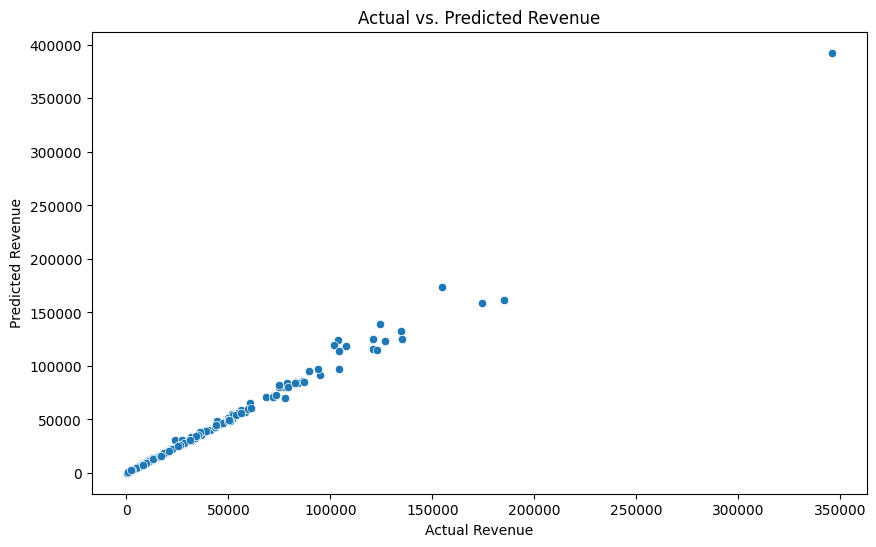

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from google.colab import files

# Upload your file using Colab's file upload tool
uploaded = files.upload()

# Read the dataset
df = pd.read_csv('/content/Sales-products.csv')

# Display basic information about the dataset
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Option 1: Drop rows with missing values
df.dropna(inplace=True)

# Option 2: Fill missing values (if applicable)
df['GrossMargin'].fillna(df['GrossMargin'].mean(), inplace=True)  # Example for numerical columns

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Verify unique values in categorical columns
print(df['RetailerCountry'].unique())
print(df['OrderMethod'].unique())

# Standardize inconsistent entries (e.g., different cases or spellings)
df['OrderMethod'] = df['OrderMethod'].str.strip().str.capitalize()

# Ensure Year is in integer format
df['Year'] = df['Year'].astype(int)

# Ensure Revenue is in numeric format
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')

# Calculate Profit from Revenue and Gross Margin
df['Profit'] = df['Revenue'] * df['GrossMargin'] / 100

# Visualize Revenue distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Revenue'], bins=20, kde=True)
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

# Visualize total revenue by Product Line
plt.figure(figsize=(12, 6))
sns.barplot(x='ProductLine', y='Revenue', data=df, estimator=sum)
plt.title('Total Revenue by Product Line')
plt.xticks(rotation=45)
plt.show()

# Plot Revenue trend over years
plt.figure(figsize=(10, 6))
df.groupby('Year')['Revenue'].sum().plot(kind='line', marker='o')
plt.title('Revenue Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

# Save cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)
files.download('cleaned_dataset.csv')

# Extract Quarter and Year from 'Quarter' column
df[['Quarter', 'Year']] = df['Quarter'].str.extract(r'Q(\d) (\d{4})')

# Convert 'Quarter' and 'Year' columns to integers
df['Quarter'] = df['Quarter'].astype(int)
df['Year'] = df['Year'].astype(int)

# Remove 'SaleID' as it is just an identifier and not useful for prediction
X = df.drop(columns=['Revenue', 'SaleID'])  # Remove 'SaleID' and 'Revenue'

# Verify that 'SaleID' is removed
print(X.columns)

# Define the target variable (Revenue)
y = df['Revenue']

# Encode categorical variables using LabelEncoder
le = LabelEncoder()
categorical_cols = ['RetailerCountry', 'OrderMethod', 'RetailerType', 'ProductLine', 'ProductType', 'Product']
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# Verify that all columns are numeric
print(X.dtypes)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2 * 100:.2f}%")  # Result out of 100

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Revenue')
plt.show()


       Actual   Predicted
698   3298.00   3124.1252
235   5700.00   5594.4314
168   1960.00   1809.7625
714  13692.55  13872.7660
949   1066.00   1202.6893


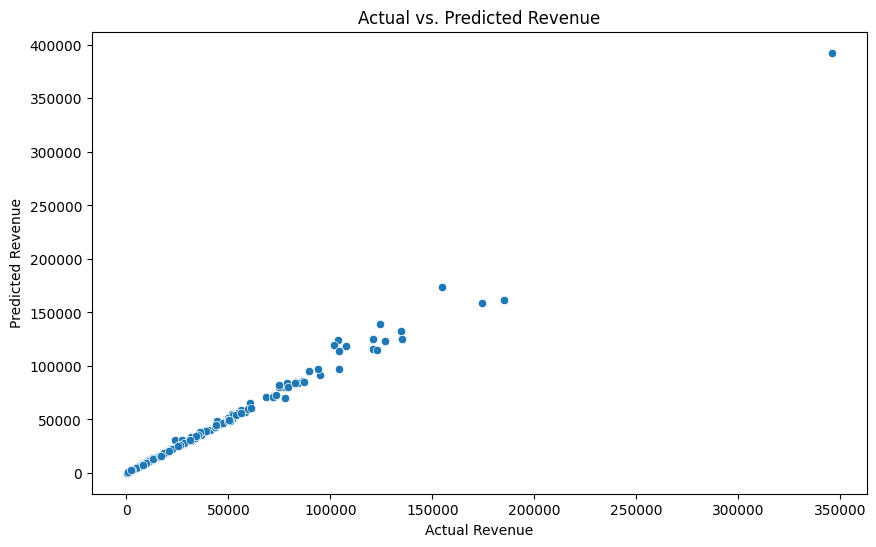

Mean Absolute Error: 1523.9189661224511
R^2 Score: 98.63%


In [39]:
# Make predictions
y_pred = model.predict(X_test)

# Print the first few predictions and actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Revenue')
plt.show()

# Print model evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2 * 100:.2f}%")  # Result out of 100


2. Feature Selection:
Recursive Feature Elimination (RFE) can help in selecting the most important features that contribute to the prediction, thereby improving model performance.

In [40]:
from sklearn.feature_selection import RFE

# Initialize RandomForestRegressor and RFE
selector = RFE(estimator=RandomForestRegressor(random_state=42), n_features_to_select=10)

# Fit RFE
selector = selector.fit(X_train, y_train)

# Print selected features
selected_features = X_train.columns[selector.support_]
print("Selected Features:", selected_features)

# Train the model on selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model.fit(X_train_selected, y_train)

# Evaluate the model
y_pred = model.predict(X_test_selected)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model with Selected Features Mean Absolute Error: {mae}")
print(f"Model with Selected Features R^2 Score: {r2 * 100:.2f}%")


Selected Features: Index(['RetailerCountry', 'OrderMethod', 'RetailerType', 'ProductLine',
       'ProductType', 'Product', 'Quarter', 'Quantity', 'GrossMargin',
       'Profit'],
      dtype='object')
Model with Selected Features Mean Absolute Error: 1492.9915061224513
Model with Selected Features R^2 Score: 98.82%


Hyperparameter Tuning using GridSearchCV
We'll perform grid search to find the best combination of hyperparameters for the RandomForestRegressor.

In [41]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,  # 3-fold cross-validation
                           n_jobs=-1,  # Use all processors
                           verbose=2,  # Show detailed results
                           scoring='neg_mean_absolute_error')  # Use MAE as the scoring metric

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Train the model with the best parameters
y_pred = best_model.predict(X_test)

# Evaluate the improved model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Improved Model Mean Absolute Error: {mae}")
print(f"Improved Model R^2 Score: {r2 * 100:.2f}%")


Cross-validation helps you get a more reliable estimate of your model's performance by using multiple train-test splits. It reduces the risk of overfitting to a particular train-test split.

In [42]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_absolute_error')  # 5-fold cross-validation

# Convert negative MAE scores to positive
cv_scores = -cv_scores

# Display results
print(f"Cross-validation Mean Absolute Error (MAE): {cv_scores.mean()} ± {cv_scores.std()}")


NameError: name 'best_model' is not defined

Gradient Boosting, XGBoost, or LightGBM: These are gradient boosting models that tend to perform better than Random Forest in many cases.

In [43]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize the model
model = XGBRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost Mean Absolute Error: {mae}")
print(f"XGBoost R^2 Score: {r2 * 100:.2f}%")


XGBoost Mean Absolute Error: 2939.175560342594
XGBoost R^2 Score: 60.91%
